In [ ]:
from tensorflow import keras
from keras.applications.mobilenet_v2 import MobileNetV2
# FOr more pre-trained models, please refer https://keras.io/applications

In [ ]:
# Input images will be in (224, 224, 3)
model = MobileNetV2() 
model.summary()
# Checking the architecture of MobileNet pre-trained model

14540800/14536120 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________

In [ ]:
# https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a
# List of all 1000 categories from ImageNet Competition

In [ ]:
!wget https://freesvg.org/img/analogclock.png -O analog.jpg

--2021-04-21 16:19:55--  https://freesvg.org/img/analogclock.png
Resolving freesvg.org (freesvg.org)... 104.21.22.205, 172.67.206.236, 2606:4700:3033::ac43:ceec, ...
Connecting to freesvg.org (freesvg.org)|104.21.22.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73336 (72K) [image/png]
Saving to: ‘analog.jpg’

analog.jpg          100%[===================>]  71.62K  --.-KB/s    in 0.01s   

2021-04-21 16:19:55 (7.01 MB/s) - ‘analog.jpg’ saved [73336/73336]



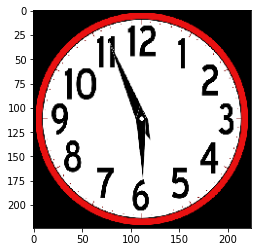

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

x = image.load_img('analog.jpg',target_size=(224,224,3))
plt.imshow(x)

In [ ]:
x = image.img_to_array(x)
x.shape

(224, 224, 3)

In [ ]:
import numpy as np
x = np.expand_dims(x,axis=0) # Expand the shape of an array. Insert a new axis that will appear at the axis position in the expanded array shape.
x.shape

(1, 224, 224, 3)

In [ ]:
from keras.applications.mobilenet_v2 import preprocess_input,decode_predictions

In [ ]:
x = preprocess_input(x)  # Preprocessing the image as required by Keras model
y = model.predict(x)
label = decode_predictions(y) # Decoding the top 5 predictions from 1000 labels
label

40960/35363 [==================================] - 0s 0us/step


[[('n02708093', 'analog_clock', 0.65196496),
  ('n04548280', 'wall_clock', 0.28459433),
  ('n04328186', 'stopwatch', 0.00095194514),
  ('n03445777', 'golf_ball', 0.000686733),
  ('n07716906', 'spaghetti_squash', 0.0005563131)]]